In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

In [3]:
import zipfile
with zipfile.ZipFile('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/CAMPUS/jamb2018/arcs-j/Images/')

In [4]:
!ls /home/CAMPUS/jamb2018/arcs-j/Images

AutoGen      AutoRand	AutoRand2.zip  AutoRand3.zip  AutoStraight
AutoGen.zip  AutoRand2	AutoRand3      AutoRand.zip   AutoStraight.zip


In [5]:
path = Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen')

In [6]:
path.ls()

(#3) [Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight')]

In [7]:
(path/'left').ls()

(#2673) [Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/00589.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/01626.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/00001.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/01552.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/01189.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/00502.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/00828.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/01359.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/00561.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/left/01430.png')...]

In [8]:
(path/'right').ls()

(#2766) [Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/00589.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/01626.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/00001.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/01552.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/01189.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/00502.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/00828.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/01359.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/00561.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/right/01430.png')...]

In [9]:
(path/'straight').ls()

(#9058) [Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/05728.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/06389.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/00589.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/06941.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/01626.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/05893.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/06512.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/07103.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/04090.png'),Path('/home/CAMPUS/jamb2018/arcs-j/Images/AutoGen/straight/07705.png')...]

# Classification

In [10]:
db = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        get_y=parent_label,
        splitter=RandomSplitter(valid_pct=0.2, seed=47),
        item_tfms=Resize(224),
        batch_tfms=aug_transforms(do_flip=False, flip_vert=False)
)
dls = db.dataloaders(path, bs=256)

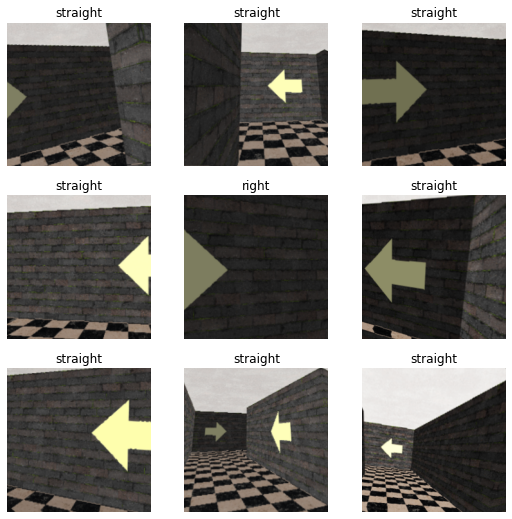

In [11]:
dls.show_batch()

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(50, cbs=SaveModelCallback())

epoch,train_loss,valid_loss,error_rate,time
0,1.169634,0.511511,0.154191,00:20


Better model found at epoch 0 with valid_loss value: 0.5115107893943787.


epoch,train_loss,valid_loss,error_rate,time
0,0.658980,0.432213,0.123491,00:25
1,0.573085,0.353028,0.112108,00:24
2,0.511845,0.348312,0.108313,00:24
3,0.469536,0.341873,0.110728,00:24
4,0.432522,0.307689,0.096930,00:24
5,0.404371,0.297085,0.096930,00:24
6,0.374784,0.303742,0.098310,00:24
7,0.360608,0.322465,0.101069,00:24
8,0.347550,0.305999,0.099690,00:24
9,0.331609,0.303840,0.099000,00:24


Better model found at epoch 0 with valid_loss value: 0.4322129487991333.
Better model found at epoch 1 with valid_loss value: 0.35302767157554626.
Better model found at epoch 2 with valid_loss value: 0.34831181168556213.
Better model found at epoch 3 with valid_loss value: 0.34187304973602295.
Better model found at epoch 4 with valid_loss value: 0.30768853425979614.
Better model found at epoch 5 with valid_loss value: 0.2970852255821228.
Better model found at epoch 10 with valid_loss value: 0.2969367504119873.
Better model found at epoch 12 with valid_loss value: 0.29368945956230164.
Better model found at epoch 14 with valid_loss value: 0.2820202708244324.
Better model found at epoch 15 with valid_loss value: 0.2720003128051758.
Better model found at epoch 19 with valid_loss value: 0.2664322555065155.
Better model found at epoch 20 with valid_loss value: 0.26083678007125854.
Better model found at epoch 21 with valid_loss value: 0.2437029629945755.
Better model found at epoch 26 with va

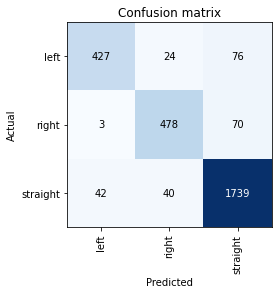

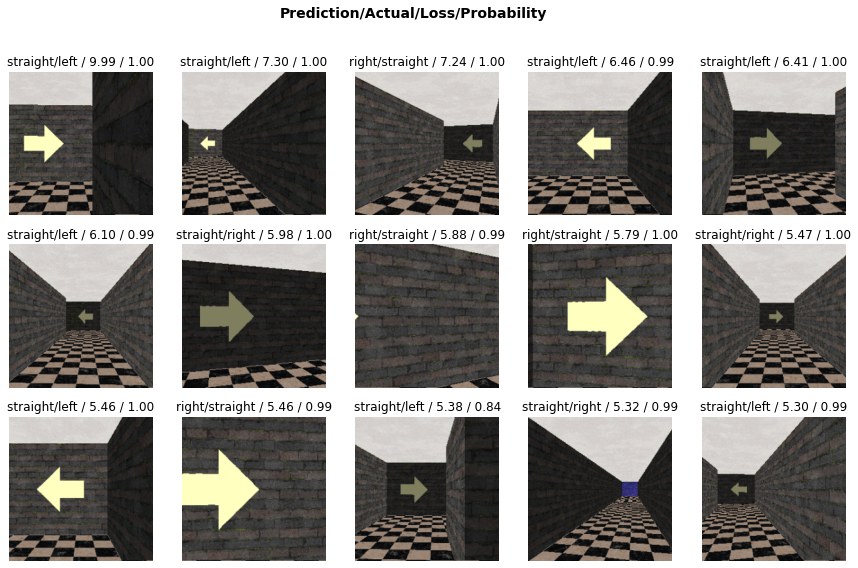

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(15)

In [25]:
learn.export('/home/CAMPUS/jamb2018/arcs-j/Models/auto-gen-c.pkl')

# Regression

In [15]:
def parent_to_deg(f):
    parent = parent_label(f)
    if parent == 'left': return 90.
    elif parent == 'right': return -90.
    else: return 0.

In [16]:
db_r = DataBlock(
        blocks=(ImageBlock, RegressionBlock(n_out=2)),
        get_items=get_image_files,
        get_y=parent_to_deg,
        splitter=RandomSplitter(valid_pct=0.2, seed=47),
        item_tfms=Resize(224),
        batch_tfms=aug_transforms(do_flip=False, flip_vert=False)
)

dls_r = db_r.dataloaders(path, bs=128)

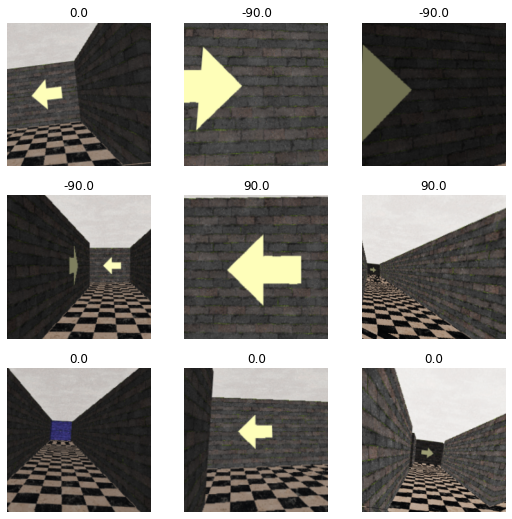

In [17]:
dls_r.show_batch()

In [18]:
def sin_cos_loss(preds, targs):
    rad_targs = targs / 180 * np.pi
    x_targs = torch.cos(rad_targs)
    y_targs = torch.sin(rad_targs)
    x_preds = preds[:, 0]
    y_preds = preds[:, 1]
    return ((x_preds - x_targs)**2 + (y_preds - y_targs)**2).mean()

In [19]:
def within_angle(preds, targs, angle):
    rad_targs = targs / 180 * np.pi
    angle_pred = torch.atan2(preds[:,1], preds[:,0])
    abs_diff = torch.abs(rad_targs - angle_pred)
    angle_diff = torch.where(abs_diff > np.pi, np.pi*2. - abs_diff, abs_diff)
    return torch.where(angle_diff < angle, 1., 0.).mean()

In [20]:
def within_45_deg(preds, targs):
    return within_angle(preds, targs, np.pi / 4)

In [21]:
def within_30_deg(preds, targs):
    return within_angle(preds, targs, np.pi / 6)

In [22]:
def within_15_deg(preds, targs):
    return within_angle(preds, targs, np.pi / 12)

In [23]:
learn_r = cnn_learner(dls_r, resnet34, loss_func=sin_cos_loss, y_range=(-1, 1),
                     metrics=[within_45_deg, within_30_deg, within_15_deg])
learn_r.fine_tune(40, cbs=SaveModelCallback(monitor='valid_loss'))

epoch,train_loss,valid_loss,within_45_deg,within_30_deg,within_15_deg,time
0,1.082606,0.625291,0.692308,0.383236,0.171438,00:21


Better model found at epoch 0 with valid_loss value: 0.6252912878990173.


epoch,train_loss,valid_loss,within_45_deg,within_30_deg,within_15_deg,time
0,0.614533,0.404575,0.847879,0.630562,0.428424,00:26
1,0.483451,0.294277,0.879959,0.734736,0.554674,00:25
2,0.409518,0.254130,0.888237,0.783719,0.620214,00:25
3,0.349325,0.214598,0.894791,0.847189,0.702656,00:25
4,0.306010,0.213811,0.896171,0.846844,0.682304,00:25
5,0.266546,0.185556,0.897896,0.878579,0.804415,00:25
6,0.245623,0.204406,0.896861,0.853053,0.783719,00:25
7,0.229351,0.196315,0.895481,0.869955,0.818213,00:25
8,0.227759,0.211729,0.883408,0.850983,0.774405,00:25
9,0.215779,0.180260,0.896516,0.883063,0.841670,00:25


Better model found at epoch 0 with valid_loss value: 0.4045746624469757.
Better model found at epoch 1 with valid_loss value: 0.2942770719528198.
Better model found at epoch 2 with valid_loss value: 0.2541300654411316.
Better model found at epoch 3 with valid_loss value: 0.21459801495075226.
Better model found at epoch 4 with valid_loss value: 0.21381141245365143.
Better model found at epoch 5 with valid_loss value: 0.18555593490600586.
Better model found at epoch 9 with valid_loss value: 0.18025954067707062.
Better model found at epoch 10 with valid_loss value: 0.17735262215137482.
Better model found at epoch 14 with valid_loss value: 0.16911417245864868.
Better model found at epoch 16 with valid_loss value: 0.16253462433815002.
Better model found at epoch 17 with valid_loss value: 0.16073091328144073.
Better model found at epoch 21 with valid_loss value: 0.15808814764022827.
Better model found at epoch 24 with valid_loss value: 0.1486552506685257.


In [26]:
learn_r.export('/home/CAMPUS/jamb2018/arcs-j/Models/auto-gen-r.pkl')

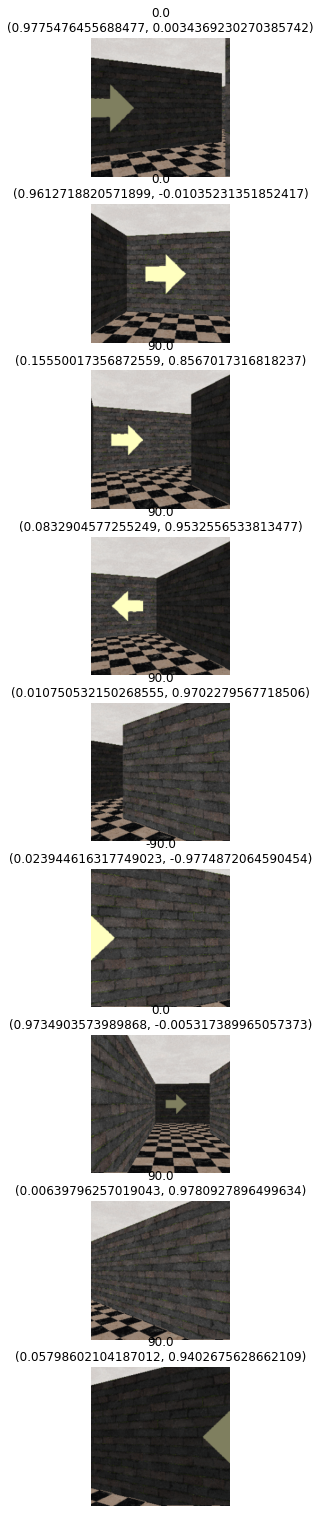

In [28]:
learn_r.show_results(nrows=9)